In [34]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
import shutil
import sklearn
from sklearn.model_selection import train_test_split
from rich.progress import Progress
import random
from tensorflow import keras
import seaborn as sns
from keras import models,layers
from tensorflow.keras.datasets import mnist
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve,average_precision_score

In [35]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [36]:
X_train = X_train/255.0
X_test = X_test/255.0

In [37]:
def build_lenet_model():
    model = models.Sequential([
        layers.Conv2D(6,kernel_size=5,activation='tanh',input_shape=(28,28,1)),
        layers.AveragePooling2D(pool_size=(2,2)),
        layers.Conv2D(16,kernel_size=5,activation='tanh'),
        layers.AveragePooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(120,activation='tanh'),
        layers.Dense(84,activation='tanh'),
        layers.Dense(10,activation='softmax'),
    ])

    return model

In [38]:
model = build_lenet_model()

c:\ProgramData\anaconda3\envs\ML\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['Accuracy'])

In [40]:
history = model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, Y_test)
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - Accuracy: 0.9298 - loss: 0.2334 - val_Accuracy: 0.9635 - val_loss: 0.1159
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - Accuracy: 0.9731 - loss: 0.0881 - val_Accuracy: 0.9762 - val_loss: 0.0723
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - Accuracy: 0.9803 - loss: 0.0625 - val_Accuracy: 0.9810 - val_loss: 0.0614
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - Accuracy: 0.9855 - loss: 0.0468 - val_Accuracy: 0.9837 - val_loss: 0.0521
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - Accuracy: 0.9878 - loss: 0.0384 - val_Accuracy: 0.9833 - val_loss: 0.0509
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - Accuracy: 0.9899 - loss: 0.0319 - val_Accuracy: 0.9849 - val_loss: 0.0516
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - Accuracy: 0.9915 - loss: 0.0261 - val_Accuracy: 0.9835 - val_loss: 0.0536
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - Accuracy: 0.9921 - loss: 0.0235 - 

In [41]:
loss_train = history.history['loss']
accuracy_train = history.history['Accuracy']

loss_test = history.history['val_loss']
accuracy_test = history.history['val_Accuracy']

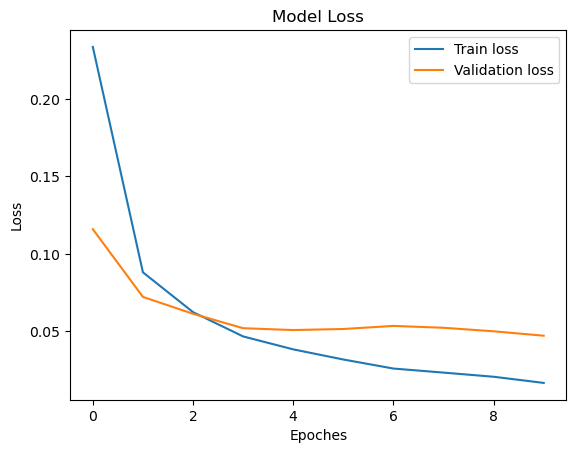

In [42]:
plt.figure()
plt.plot(loss_train)
plt.plot(loss_test)
plt.title('Model Loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend(['Train loss','Validation loss'])
plt.show()

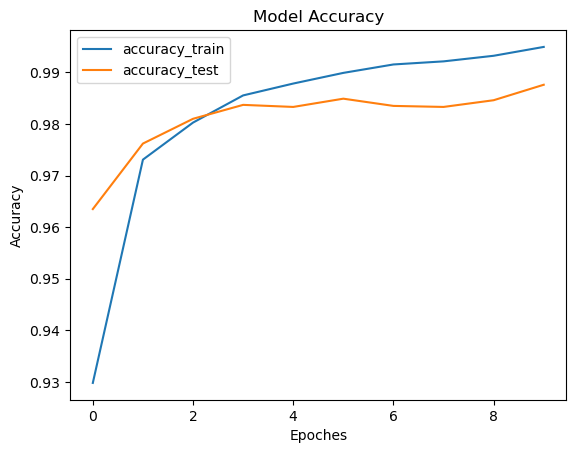

In [43]:
plt.figure()
plt.plot(accuracy_train)
plt.plot(accuracy_test)
plt.title('Model Accuracy')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend(['accuracy_train','accuracy_test'])
plt.show()

In [44]:
prediction = model.predict(X_test)
y_prd = np.argmax(prediction,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [45]:
print(y_prd[5])
print(Y_test[5])

1
1


Saved heatmap to ../outputs/heatmap.png


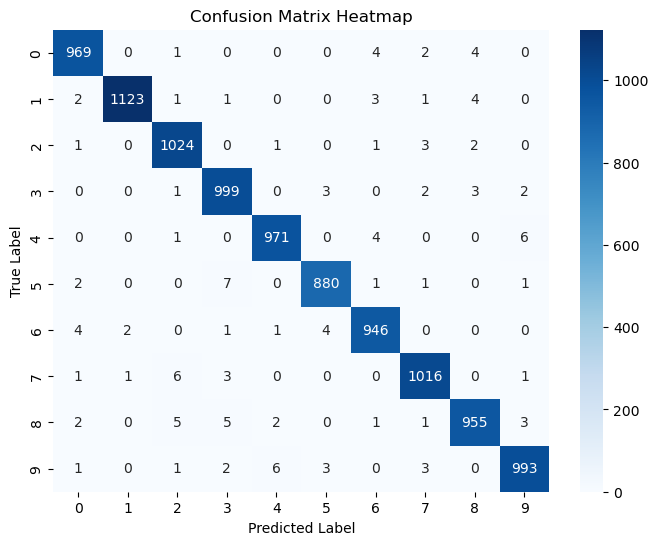

In [46]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_prd)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=range(10),
    yticklabels=range(10)
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
save_path = '../outputs/heatmap.png'
plt.savefig(save_path, dpi=300, bbox_inches="tight")
print(f"Saved heatmap to {save_path}")
plt.show()

In [47]:
model.save('../models/mnist_tensorflow_prediction_model.h5')

In [48]:
Y_test_bin = label_binarize(Y_test, classes=[0,1,2,3,4,5,6,7,8,9])

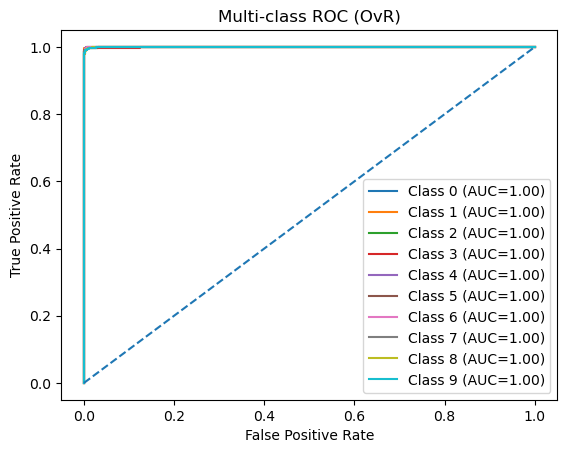

In [49]:
plt.figure()

for i in range(10):
    fpr, tpr, _ = roc_curve(Y_test_bin[:, i], prediction[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC={roc_auc:.2f})')

plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC (OvR)')
plt.legend()
plt.show()


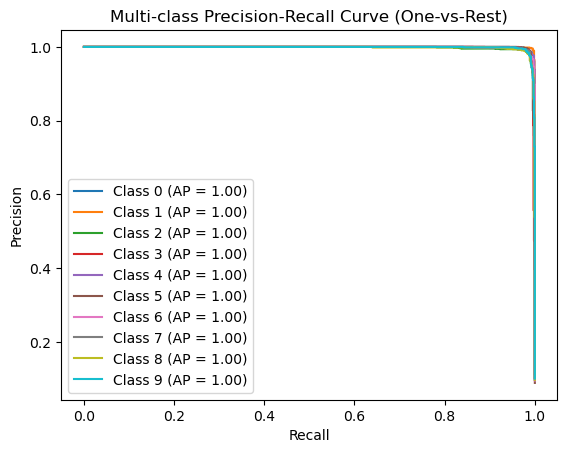

In [50]:
plt.figure()

for i in range(10):
    precision, recall, _ = precision_recall_curve(
        Y_test_bin[:, i],
        prediction[:, i]
    )
    
    avg_precision = average_precision_score(
        Y_test_bin[:, i],
        prediction[:, i]
    )
    
    plt.plot(recall, precision, label=f'Class {i} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multi-class Precision-Recall Curve (One-vs-Rest)')
plt.legend()
plt.show()